In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from pid import PIDController
import system

### load

In [ ]:
model_type= 'discrete'  # 'continuous' or 'discrete'
data_path= 'data/'  # Path to the data directory

model_data = sio.loadmat(data_path + model_type + '_time_model.mat',mat_dtype= True)
v = np.loadtxt(data_path + 't_amb.txt')
A= model_data['model'][0][0][0]
Bu= model_data['model'][0][0][1]
Bv= model_data['model'][0][0][2]
Bvu= model_data['model'][0][0][3]
Bxu= model_data['model'][0][0][4]

#  check shapes
A.shape, Bu.shape, Bv.shape, Bvu.shape, Bxu.shape

In [4]:
# check linearity
if not np.all(Bvu==0): print('Bvu !=0: \n', np.argwhere(Bvu != 0)[0:3,:])
if not np.all(Bvu==0): print('Bxu !=0: \n', np.argwhere(Bvu != 0)[0:3,:])

Bvu !=0: 
 [[0 0 7]
 [0 3 5]
 [0 3 6]]
Bxu !=0: 
 [[0 0 7]
 [0 3 5]
 [0 3 6]]


### simple discrete system

In [29]:
system_size= 1
x0= 20 # Initial state
print('model A: ', round(A[0,0],2), 'Bu: ', round(Bu[0,11],2), 'Bv: ', round(Bv[0,3],2))
A_= 1
Bu_= 0.5
Bv_= 0.02
print('my A:     ', A_, '  Bu: ', Bu_, ' Bv: ', Bv_)

model A:  0.03 Bu:  0.04 Bv:  0.04
my A:      1   Bu:  0.5  Bv:  0.02


In [ ]:
# Simulation parameters
time = np.linspace(0, 24, 24*4)  # 24 hours, for 15' 
dt = time[1] - time[0]

# Initialize PID controller
setpoint = 23  # Desired temperature
pid = PIDController(Kp=0.5, Ki=0.5, Kd=0.0, setpoint=setpoint)
system_model= system.SimpleDiscrete(A_, Bu_, Bv_, x0, dt)

process_values = [x0]
control_values= []

# Simulate the process
for i,t in enumerate(time):
    # PID control output
    u_t = pid.compute(system_model.x, dt)
    
    # Simulate process dynamics
    system_model.step(u_t, v[i])
    
    # Store for history
    process_values.append(system_model.x)
    control_values.append(u_t)

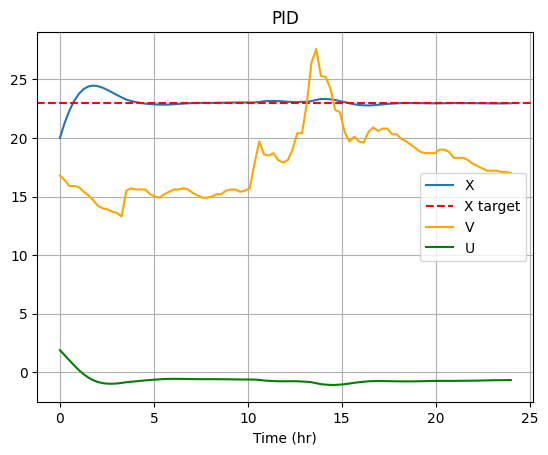

In [39]:
# Plot results
plt.plot(time, process_values[:-1], label='X')
plt.axhline(y=setpoint, color='r', linestyle='--', label='X target')
plt.plot(time,v, label='V', color='orange')
plt.plot(time, control_values, label='U', color='green')
plt.xlabel('Time (hr)')
plt.title('PID')
plt.legend()
plt.grid()
plt.show()